#06-04 자동 미분과 선형 회귀 실습

자동 미분

In [ ]:
import tensorflow as tf

In [ ]:
w=tf.Variable(2.)

def f(w):
    y=w**2
    z=2*y + 5
    return z

In [ ]:
with tf.GradientTape() as tape:
    z=f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


##자동 미분을 이용한 선형 회귀 구현

가중치 변수 w와 b를 선언합니다. 학습될 값이므로 임의의 값인 4와 1로 초기화

In [ ]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [ ]:
#가설을 함수로서 정의
@tf.function
def hypothesis(x):
  return w*x + b

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [ ]:
#평균 제곱 오차를 손실 함수로서 정의

@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
optimizer = tf.optimizers.SGD(0.01)

In [ ]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


##케라스로 구현하는 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers


In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 425ms/step - loss: 2692.7302 - mse: 2692.7302
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 332.3209 - mse: 332.3209
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 41.8896 - mse: 41.8896
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 6.1537 - mse: 6.1537
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 1.7560 - mse: 1.7560
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2144 - mse: 1.2144
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1472 - mse: 1.1472
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1383 - mse: 1.1383
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1367 - mse: 1.1367
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 1.1359 - mse: 1.1359
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 158ms/step


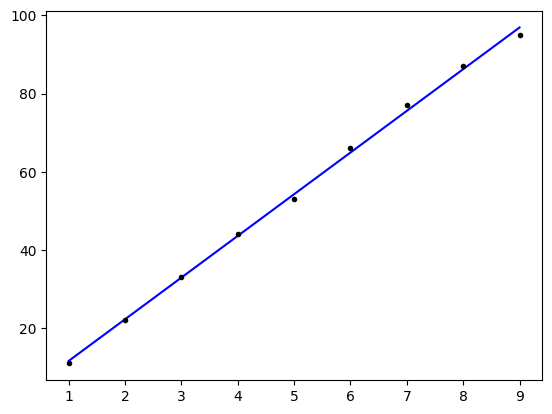

In [ ]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [ ]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 78ms/step
[[102.204735]]


#06-05 로지스틱 회귀(Logistic Regression)


이진 분류는 텍스트로

##시그모이드 함수(Sigmoid function)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

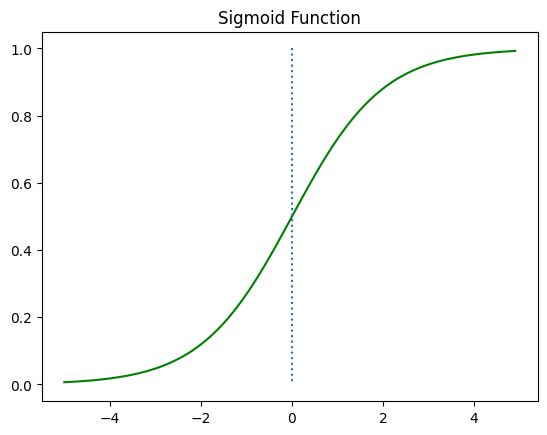

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

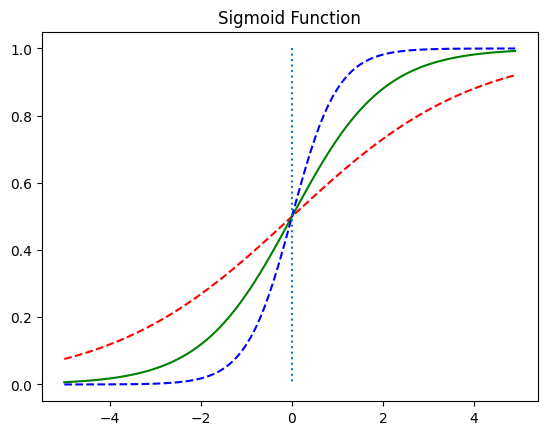

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

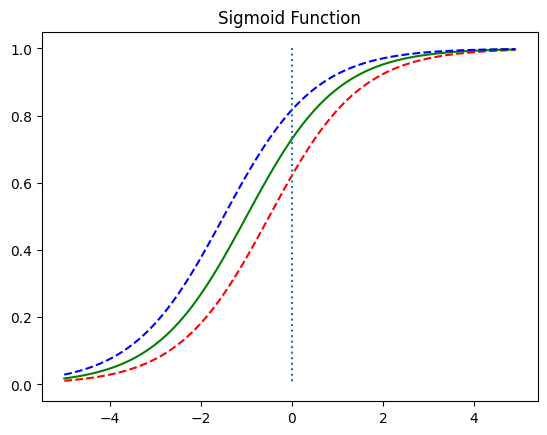

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

비용 함수도 텍스트로

#06-06 로지스틱 회귀 실습

##케라스로 구현하는 로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 474ms/step - loss: 38.6665 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 33.1621 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 27.6580 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 22.1549 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 16.6551 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 11.1666 - binary_accuracy: 0.1538
Epoch 7/200
1/1 [==============================] - 0s 14ms/step - loss: 5.7210 - binary_accuracy: 0.1538
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7913 - binary_accuracy: 0.1538
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 0.2226 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================

1/1 [==============================] - 0s 57ms/step


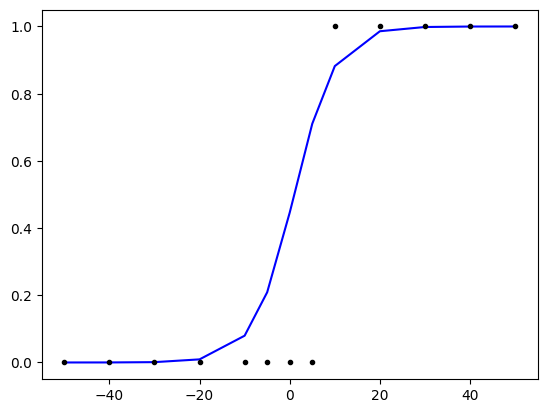

In [ ]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

1/1 [==============================] - 0s 70ms/step
[[0.5015919 ]
 [0.5570806 ]
 [0.61118054]
 [0.66267365]
 [0.6871243 ]]
1/1 [==============================] - 0s 43ms/step
[[0.9034286 ]
 [0.98863137]
 [0.99876446]
 [0.99986696]
 [1.        ]]


#06-07 다중 입력에 대한 실습

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

##다중 선형 회귀

In [ ]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1603.0430 - mse: 1603.0430
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 967.7043 - mse: 967.7043
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 598.9362 - mse: 598.9362
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 381.9608 - mse: 381.9608
Epoch 5/500
1/1 [==============================] - 0s 18ms/step - loss: 252.5047 - mse: 252.5047
Epoch 6/500
1/1 [==============================] - 0s 19ms/step - loss: 174.1780 - mse: 174.1780
Epoch 7/500
1/1 [==============================] - 0s 25ms/step - loss: 126.1285 - mse: 126.1285
Epoch 8/500
1/1 [==============================] - 0s 26ms/step - loss: 96.2528 - mse: 96.2528
Epoch 9/500
1/1 [==============================] - 0s 37ms/step - loss: 77.4311 - mse: 77.4311
Epoch 10/500
1/1 [==============================] - 0s 26ms/step - loss: 65.4177 - mse: 65.4177
Epoch 11/500
1/1 [=================

In [ ]:
print(model.predict(X))

1/1 [==============================] - 0s 77ms/step
[[74.769875]
 [81.835335]
 [70.42036 ]
 [57.467445]
 [32.455154]]


In [ ]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 35ms/step
[[59.27073 ]
 [52.932835]]


##다중 로지스틱 회귀

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 551ms/step - loss: 0.6340 - binary_accuracy: 0.6667
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6335 - binary_accuracy: 0.6667
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6329 - binary_accuracy: 0.6667
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 0.6324 - binary_accuracy: 0.6667
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6318 - binary_accuracy: 0.6667
Epoch 6/500
1/1 [==============================] - 0s 22ms/step - loss: 0.6313 - binary_accuracy: 0.6667
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6307 - binary_accuracy: 0.6667
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 0.6302 - binary_accuracy: 0.6667
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6297 - binary_accuracy: 0.6667
Epoch 10/500
1/1 [==============================] - 0s

In [ ]:
print(model.predict(X))

1/1 [==============================] - 0s 119ms/step
[[0.32319397]
 [0.60262084]
 [0.48221937]
 [0.8280581 ]
 [0.74732137]
 [0.64493006]]


#06-08 벡터와 행렬 연산

텐서(Tensor)

In [ ]:
import numpy as np

0차원 텐서(스칼라)

In [ ]:
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


1차원 텐서(벡터)

In [ ]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


2차원 텐서(행렬)

In [ ]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


3차원 텐서(다차원 배열)

In [ ]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


##벡터와 행렬의 연산

In [ ]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [ ]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


벡터의 내적과 행렬의 곱셈

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [ ]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


#06-10 소프트맥스 회귀 실습

##아이리스 품종 데이터에 대한 이해

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

('Iris.csv', <http.client.HTTPMessage at 0x7f5a5f5943d0>)

In [ ]:
data=pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수: ', len(data))
print(data[:5])

샘플의 개수:  150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


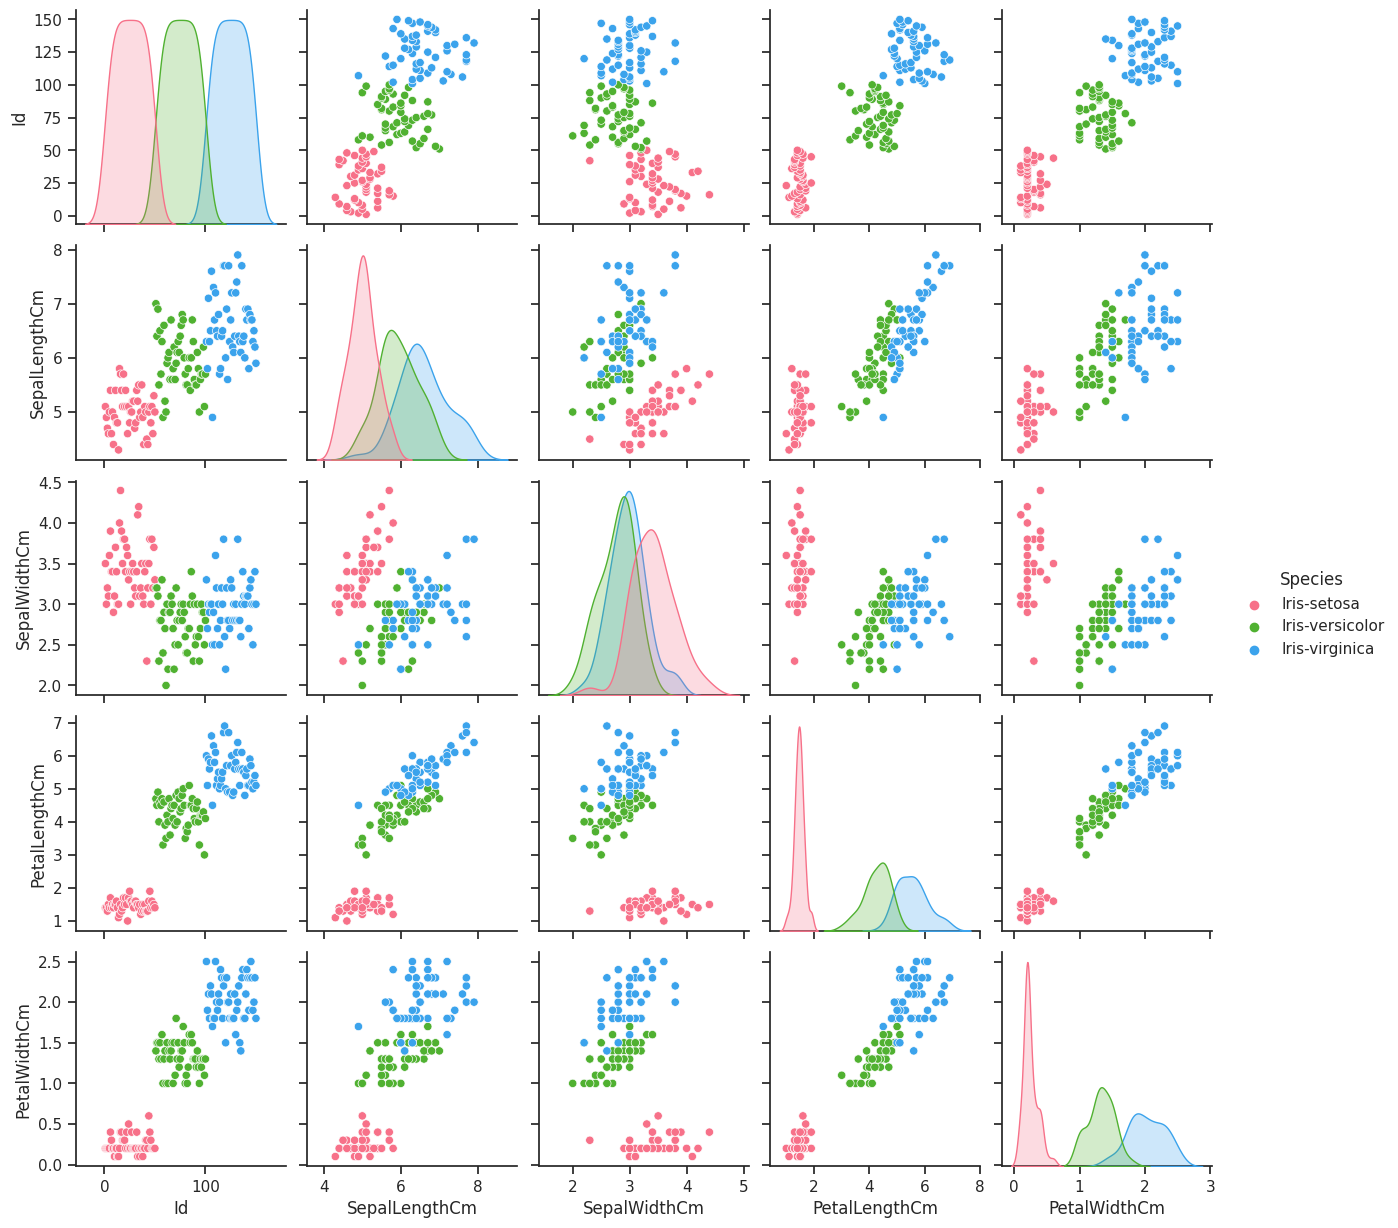

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

<ipython-input-49-0f6b83e94011>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Species'], y=data['SepalWidthCm'], ci=None)


<Axes: xlabel='Species', ylabel='SepalWidthCm'>

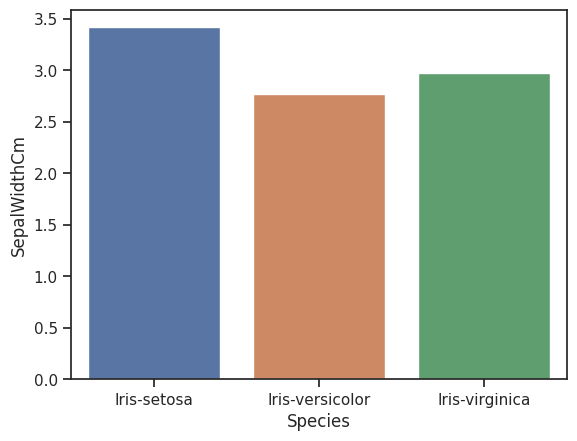

In [ ]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(x=data['Species'], y=data['SepalWidthCm'], ci=None)

<Axes: >

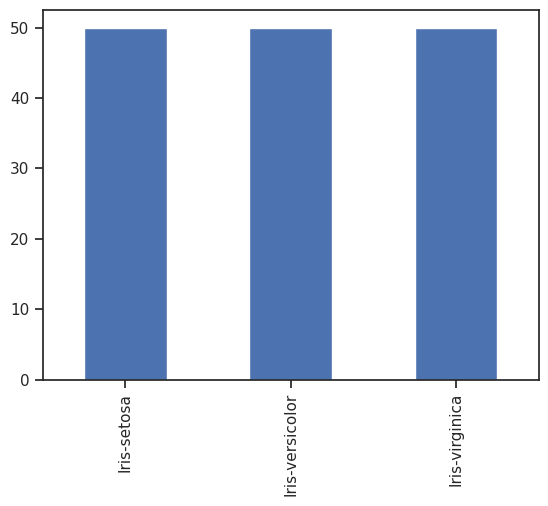

In [ ]:
data['Species'].value_counts().plot(kind='bar')

<Axes: >

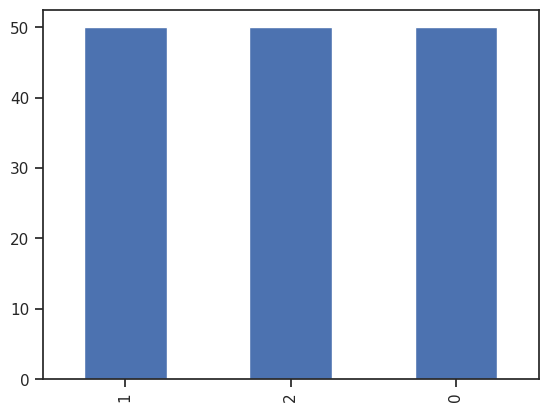

In [ ]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [ ]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [ ]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


##소프트맥스 회귀

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 2s 8ms/step - loss: 1.9315 - accuracy: 0.3083 - val_loss: 1.3785 - val_accuracy: 0.4000
Epoch 2/200
120/120 [==============================] - 1s 4ms/step - loss: 1.6059 - accuracy: 0.2667 - val_loss: 1.3463 - val_accuracy: 0.2667
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 1.4278 - accuracy: 0.1833 - val_loss: 1.3168 - val_accuracy: 0.1000
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.3208 - accuracy: 0.0667 - val_loss: 1.2860 - val_accuracy: 0.0667
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2466 - accuracy: 0.0667 - val_loss: 1.2478 - val_accuracy: 0.0333
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 1.1703 - accuracy: 0.0917 - val_loss: 1.1753 - val_accuracy: 0.0333
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 1.1043 - accuracy: 0.0833 - val_loss: 1.1035 - val_accuracy: 0.0333

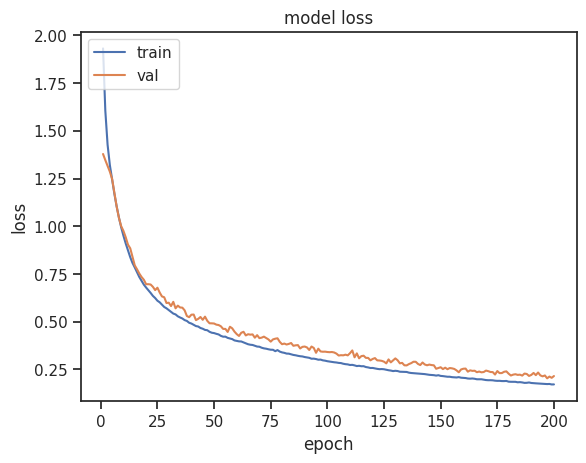

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 169ms/step - loss: 0.2152 - accuracy: 0.9667

 테스트 정확도: 0.9667
